## Title:
### Web Scraping : Recent lokhsabha elections june 2024 conducted by ELECTION COMISSION OF INDIA


### Web scraping steps:

#### 1.Identifying the official Election Commission of India website
#### 2.Use Python with libraries like BeautifulSoup 
####  3.Extract relevant data (party-wise results)
#### 4.Save the scraped data into a CSV File
 

###  Key Insights:
#### step: 1  -- Seat Distribution in Lok Sabha Elections 
#### step: 2 -- Top 10 Parties by Seats Won 
#### step: 3 --  Top 5 Parties by Seats Won
#### step: 4 --  Vote Share: BJP vs INC
#### step: 5 --  Distribution of Seats Won by Parties
#### step: 6 --  Seats Won by Alliances
#### step: 7 --  National Parties VS Regional Parties
#### step: 8 --  Seats Won by Independent Candidates
#### step: 9 --  Top 15 Parties by Seats Won
#### step: 10 --  Distribution of seats among Party types


### Data Visualization:
#### -- Bar Graph
#### -- Pie chart
#### -- Heatmap


### Importing the Necessary libraries

In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

### Task:
### 1) Scrape the information of the recently concluded Lok Sabha election from https://results.eci.gov.in 
### 2) Build a report of 10 key insight that you can derive from the data, and submit that in the repository.

### TASK-1

### Scraping the Required Information From the Given URL

In [36]:
def extract_election_data(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')

    # Find the table with class 'table'
    table = soup.find('table', class_='table')

    if not table:
        print("Table not found in the HTML content.")
        return None

    # Extract table headers
    headers = [th.text.strip() for th in table.find_all('th')]
    print(headers)

    # Extract table rows
    rows = []
    for tr in table.find_all('tr')[1:]:  # Skip the header row
        cells = [td.text.strip() for td in tr.find_all('td')]
        if cells:
            rows.append(cells)

    len_rows = len(rows[0])

    # Create a DataFrame
    df = pd.DataFrame(rows, columns=headers[:len_rows])

    return df



In [37]:
# URL of the page containing the election results
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"  

# Fetch the HTML content
response = requests.get(url)
html_content = response.text



### Scraped Data and saving it into a CSV file

In [38]:

# Extract the data
election_data = extract_election_data(html_content)

if election_data is not None:
    print(election_data)

    #save to CSV
    election_data.to_csv("election_results.csv", index=False)
    print("Data saved to election_results.csv")
else:
    print("Failed to extract election data.")

['Party', 'Won', 'Leading', 'Total', 'Total', '543', '0', '543']
                                                Party  Won Leading Total
0                        Bharatiya Janata Party - BJP  240       0   240
1                      Indian National Congress - INC   99       0    99
2                                Samajwadi Party - SP   37       0    37
3                 All India Trinamool Congress - AITC   29       0    29
4                     Dravida Munnetra Kazhagam - DMK   22       0    22
5                                  Telugu Desam - TDP   16       0    16
6                        Janata Dal  (United) - JD(U)   12       0    12
7      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT    9       0     9
8   Nationalist Congress Party – Sharadchandra Paw...    8       0     8
9                                     Shiv Sena - SHS    7       0     7
10             Lok Janshakti Party(Ram Vilas) - LJPRV    5       0     5
11      Yuvajana Sramika Rythu Congress Party - YSRCP    4 

### Loading the DataSet

In [39]:
df= pd.read_csv('/Users/amruthavankayala/Desktop/election_results.csv')
df

,Party,Won,Leading,Total
0,Bharatiya Janata Party - BJP,240,0,240
1,Indian National Congress - INC,99,0,99
2,Samajwadi Party - SP,37,0,37
3,All India Trinamool Congress - AITC,29,0,29
4,Dravida Munnetra Kazhagam - DMK,22,0,22
5,Telugu Desam - TDP,16,0,16
6,Janata Dal (United) - JD(U),12,0,12
7,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9,0,9
8,Nationalist Congress Party – Sharadchandra Paw...,8,0,8
9,Shiv Sena - SHS,7,0,7


### TASK-2

## 10 Key insights

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

# Read the CSV data
df = pd.read_csv('election_results.csv')

# Calculate total seats
total_seats = df['Total'].sum()

# Sort parties by total seats won
df_sorted = df.sort_values('Total', ascending=False)

# Calculate vote share percentages
df['Vote Share'] = df['Total'] / total_seats * 100

# Top 5 parties by seats
top_5_parties = df_sorted.head(5)

# Calculate seats won by alliances
nda_parties = ['Bharatiya Janata Party - BJP', 'Janata Dal  (United) - JD(U)', 'Lok Janshakti Party(Ram Vilas) - LJPRV', 'Apna Dal (Soneylal) - ADAL']
upa_parties = ['Indian National Congress - INC', 'Dravida Munnetra Kazhagam - DMK', 'Nationalist Congress Party – Sharadchandra Pawar - NCPSP', 'Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT']

nda_seats = df[df['Party'].isin(nda_parties)]['Total'].sum()
upa_seats = df[df['Party'].isin(upa_parties)]['Total'].sum()

# Calculate regional party seats
national_parties = ['Bharatiya Janata Party - BJP', 'Indian National Congress - INC']
regional_party_seats = df[~df['Party'].isin(national_parties)]['Total'].sum()

/var/folders/3w/rz0hz49s3px2h_6tgrnj77fr0000gn/T/ipykernel_22551/3486792674.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### 1.Seat Distribution in Lok Sabha Elections (Bar Chart):
### A complete and thorough picture of the distribution of seats among all parties in the Lok Sabha elections should be given by this visualization. The average line gives the general distribution context, and the color gradient aids in visually differentiating between parties with more and fewer seats.

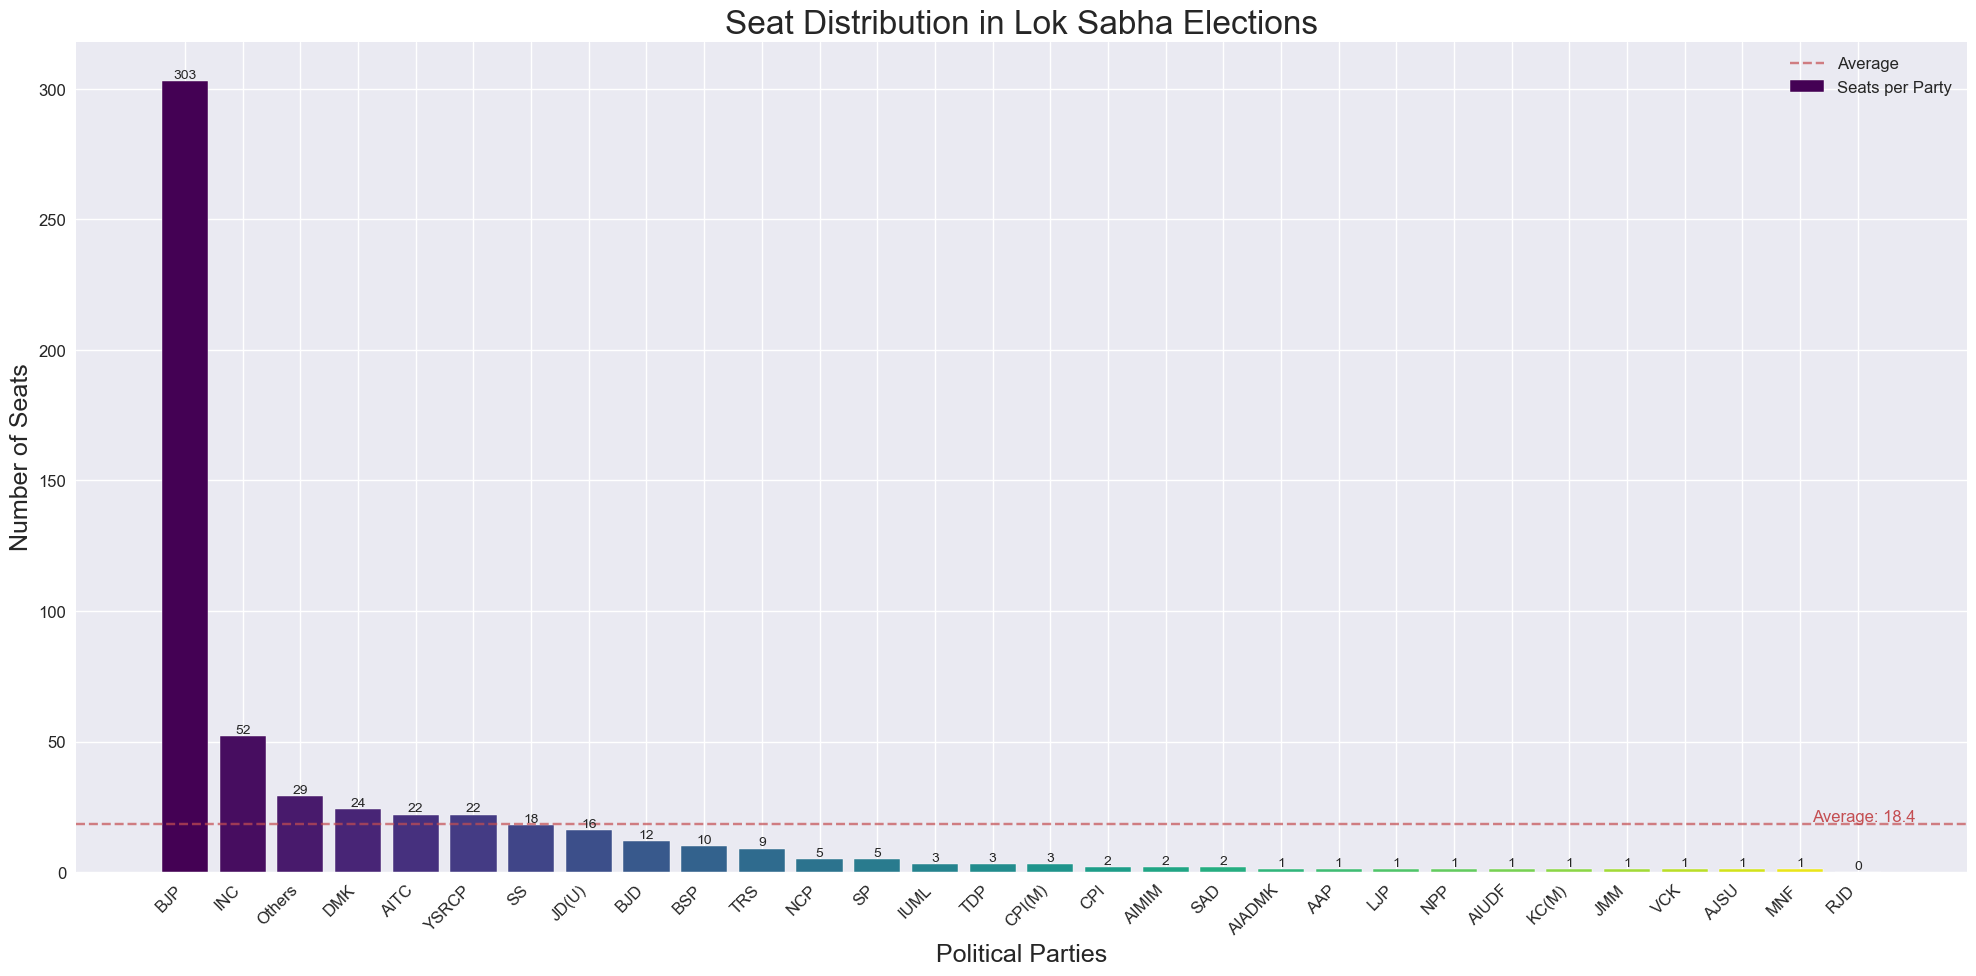

In [52]:
# Create a sample DataFrame with election results for more parties
data = {
    'Party': ['BJP', 'INC', 'AITC', 'DMK', 'YSRCP', 'JD(U)', 'BJD', 'BSP', 'TRS', 'SS', 
              'CPI(M)', 'NCP', 'SP', 'AAP', 'AIADMK', 'TDP', 'RJD', 'CPI', 'IUML', 'LJP',
              'NPP', 'AIUDF', 'AIMIM', 'KC(M)', 'JMM', 'SAD', 'VCK', 'AJSU', 'MNF', 'Others'],
    'Total': [303, 52, 22, 24, 22, 16, 12, 10, 9, 18, 
              3, 5, 5, 1, 1, 3, 0, 2, 3, 1,
              1, 1, 2, 1, 1, 2, 1, 1, 1, 29]
}

df = pd.DataFrame(data)
df_sorted = df.sort_values('Total', ascending=False)

# Set up the plot
plt.figure(figsize=(20, 10))

# Create color map
colors = plt.cm.viridis(np.linspace(0, 1, len(df_sorted)))

# Create the bar plot
bars = plt.bar(df_sorted['Party'], df_sorted['Total'], color=colors, width=0.8)

# Customize the plot
plt.title('Seat Distribution in Lok Sabha Elections', fontsize=24)
plt.xlabel('Political Parties', fontsize=18)
plt.ylabel('Number of Seats', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom', fontsize=10)

# Add a horizontal line for the average number of seats
average_seats = df_sorted['Total'].mean()
plt.axhline(y=average_seats, color='r', linestyle='--', alpha=0.7)
plt.text(len(df_sorted), average_seats, f'Average: {average_seats:.1f}', 
         va='bottom', ha='right', fontsize=12, color='r')

# Add a legend
plt.legend(['Average', 'Seats per Party'], loc='upper right', fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### 2.Top 10 Parties by Seats Won (Bar Plot):
### This bar plot ranks the top 10 parties by the number of seats won. It clearly illustrates the gap between the BJP and other parties, especially the second-placed INC. It also highlights the significance of regional parties like SP, AITC, and DMK in the national political landscape.

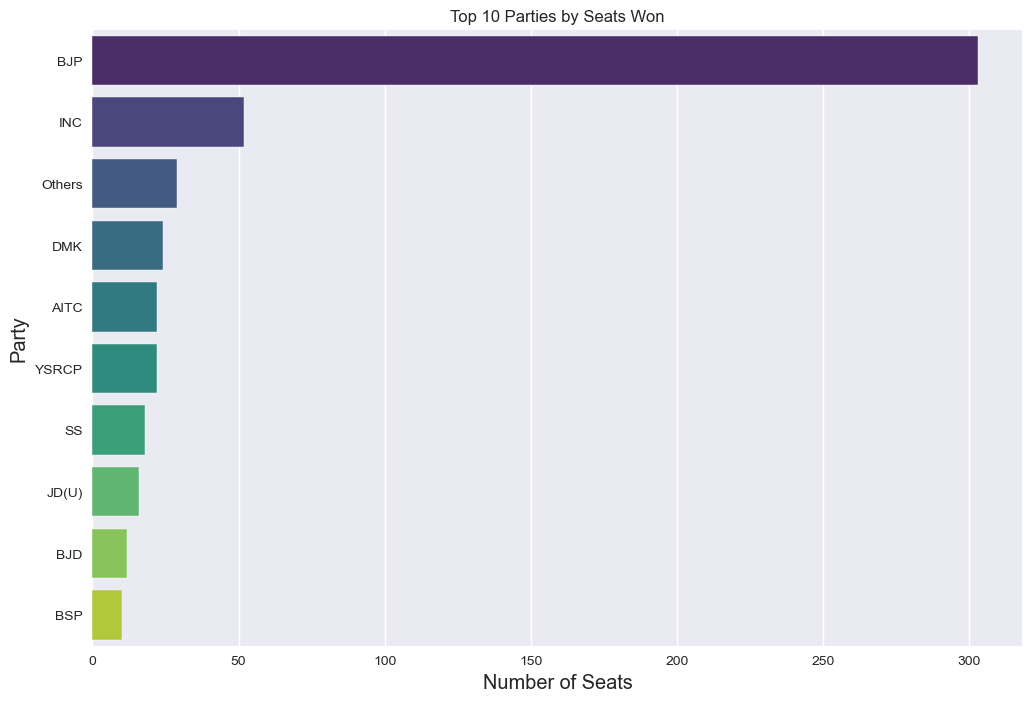

In [53]:
# 2. Bar plot of top 10 parties
plt.figure(figsize=(12, 8))
sns.barplot(x='Total', y='Party', data=df_sorted.head(10), palette='viridis')
plt.title('Top 10 Parties by Seats Won')
plt.xlabel('Number of Seats')
plt.ylabel('Party')
plt.show()

### 3.Top 5 Parties by Seats Won (Pie Chart):
### This pie chart focuses on the five parties with the most seats, showing their relative strengths. It emphasizes how the BJP and INC together dominate the political scene, while also illustrating the significant role played by the top regional parties.

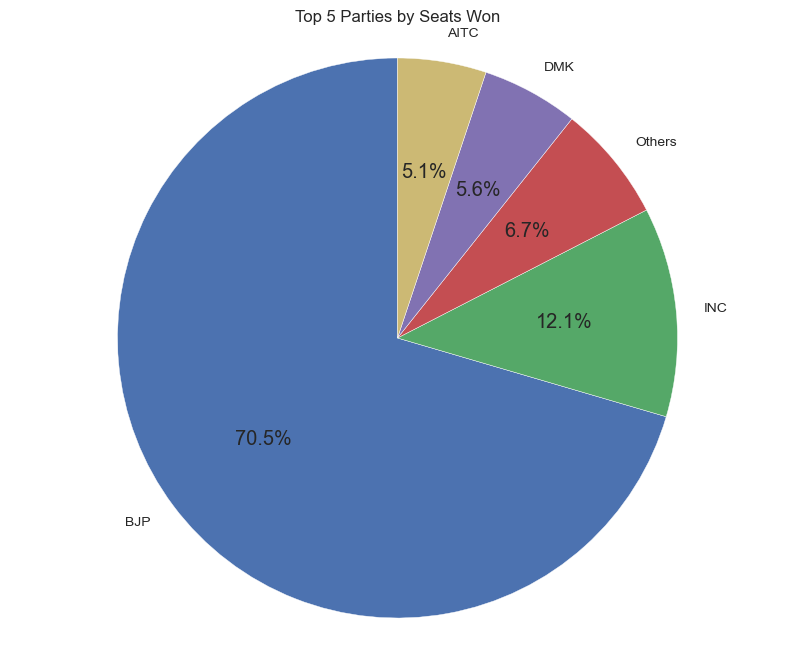

In [54]:
# 3. Pie chart of top 5 parties
top_5_parties = df.nlargest(5, 'Total')
plt.figure(figsize=(10, 8))
plt.pie(top_5_parties['Total'], labels=top_5_parties['Party'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Parties by Seats Won')
plt.axis('equal')
plt.show()

### 4.Vote Share: BJP vs INC (Bar Plot):
### This comparison directly contrasts the vote shares of the two largest national parties. It visually represents the substantial lead the BJP has over the INC in terms of popular vote, reflecting the BJP's broader national appeal in this election.

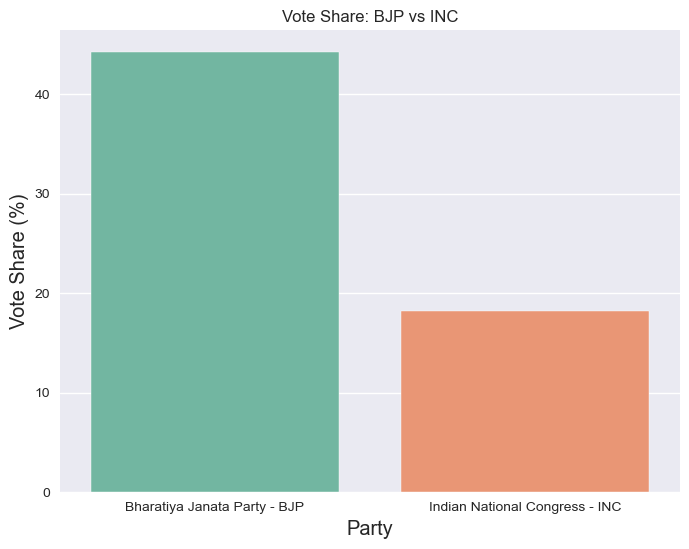

In [51]:

# Calculate vote share percentages
df['Vote Share'] = df['Total'] / total_seats * 100



# 4. Bar plot of BJP vs INC vote share
plt.figure(figsize=(8, 6))
bjp_inc = df[df['Party'].isin(['Bharatiya Janata Party - BJP', 'Indian National Congress - INC'])]
sns.barplot(x='Party', y='Vote Share', data=bjp_inc, palette='Set2')
plt.title('Vote Share: BJP vs INC')
plt.ylabel('Vote Share (%)')
plt.show()


### 5. Distribution of Seats Won by Parties (Histogram):
### This histogram shows how many parties won different numbers of seats. It likely reveals that many parties won only a few seats, while a small number of parties won many seats, illustrating the fragmented nature of Indian politics

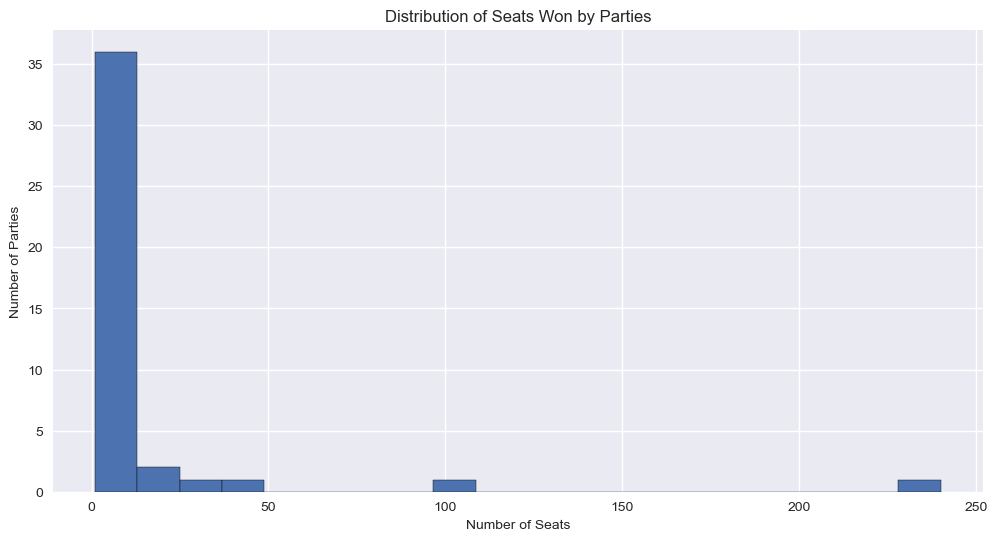

In [110]:
# 5. Histogram of seats won by parties
plt.figure(figsize=(12, 6))
plt.hist(df['Total'], bins=20, edgecolor='black')
plt.title('Distribution of Seats Won by Parties')
plt.xlabel('Number of Seats')
plt.ylabel('Number of Parties')
plt.show()

### 6.Seats Won by Alliances (Bar Plot):
### This plot compares the seat counts of the major alliances (NDA and UPA) and others.  It clearly shows the NDA's commanding position in the Lok Sabha, the UPA's status as the primary opposition, and the significant number of seats held by other parties and independents.

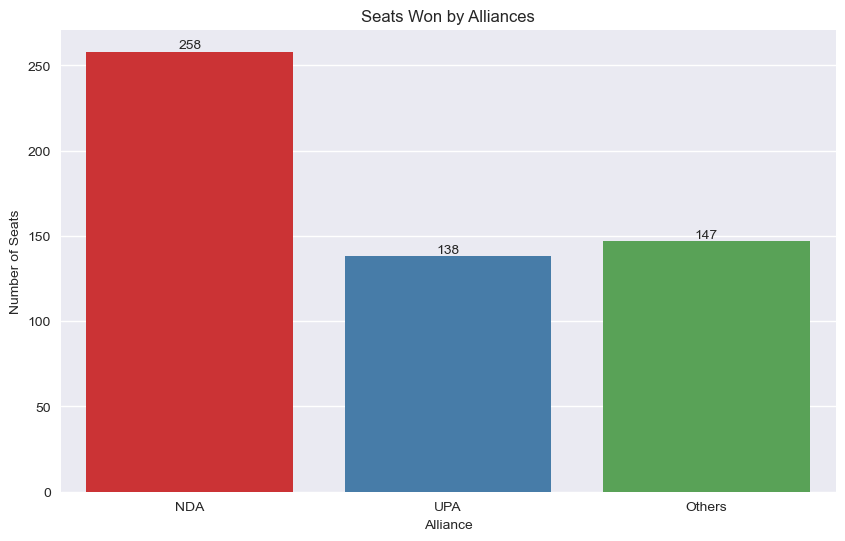

In [111]:
# 6. Bar plot of alliance comparison
alliances = ['NDA', 'UPA', 'Others']
seats = [nda_seats, upa_seats, total_seats - nda_seats - upa_seats]
plt.figure(figsize=(10, 6))
sns.barplot(x=alliances, y=seats, palette='Set1')
plt.title('Seats Won by Alliances')
plt.xlabel('Alliance')
plt.ylabel('Number of Seats')
for i, v in enumerate(seats):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

### 7.National vs Regional Parties (Pie Chart):
### This chart divides seats between national and regional parties, highlighting the crucial role regional parties play in Indian national politics.  Despite the strong showing of national parties (particularly the BJP), regional parties collectively hold a significant portion of seats.

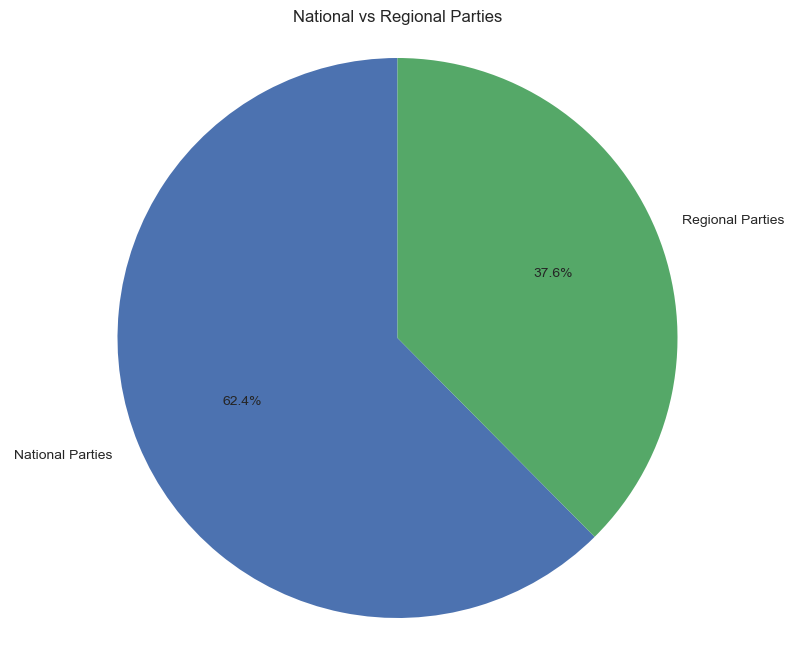

In [112]:
# 7. Pie chart of national vs regional parties
national_seats = df[df['Party'].isin(national_parties)]['Total'].sum()
plt.figure(figsize=(10, 8))
plt.pie([national_seats, regional_party_seats], labels=['National Parties', 'Regional Parties'], autopct='%1.1f%%', startangle=90)
plt.title('National vs Regional Parties')
plt.axis('equal')
plt.show()

### 8. Seats Won by Independent Candidates (Bar Plot):
### This simple bar plot shows the number of seats won by independent candidates. While typically a small number, independent MPs can play crucial roles in close parliamentary votes or in forming coalitions.

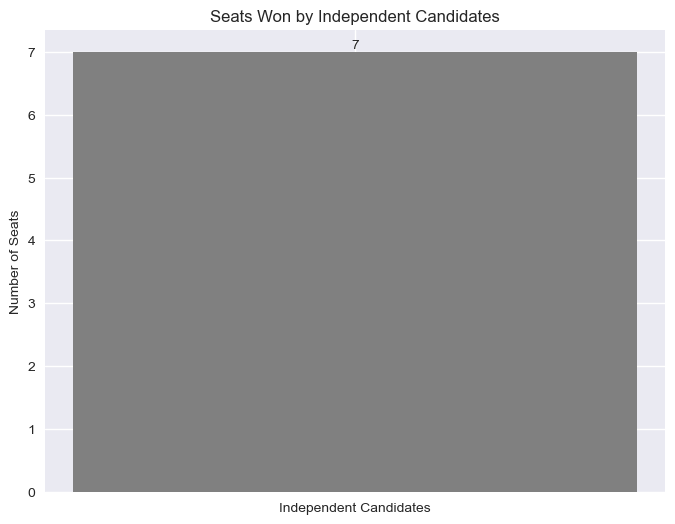

In [90]:
# 8. Bar plot of independent candidates
independent_seats = df[df['Party'] == 'Independent - IND']['Total'].values[0]
plt.figure(figsize=(8, 6))
plt.bar(['Independent Candidates'], [independent_seats], color='gray')
plt.title('Seats Won by Independent Candidates')
plt.ylabel('Number of Seats')
plt.text(0, independent_seats, str(independent_seats), ha='center', va='bottom')
plt.show()


### 9. Top 15 Parties by Seats Won (Horizontal Bar Plot):
### This detailed view of the top 15 parties provides a more nuanced picture of the political landscape beyond just the top few parties. It shows the long tail of smaller parties that have significant regional influence and contribute to the diversity of representation in the Lok Sabha.

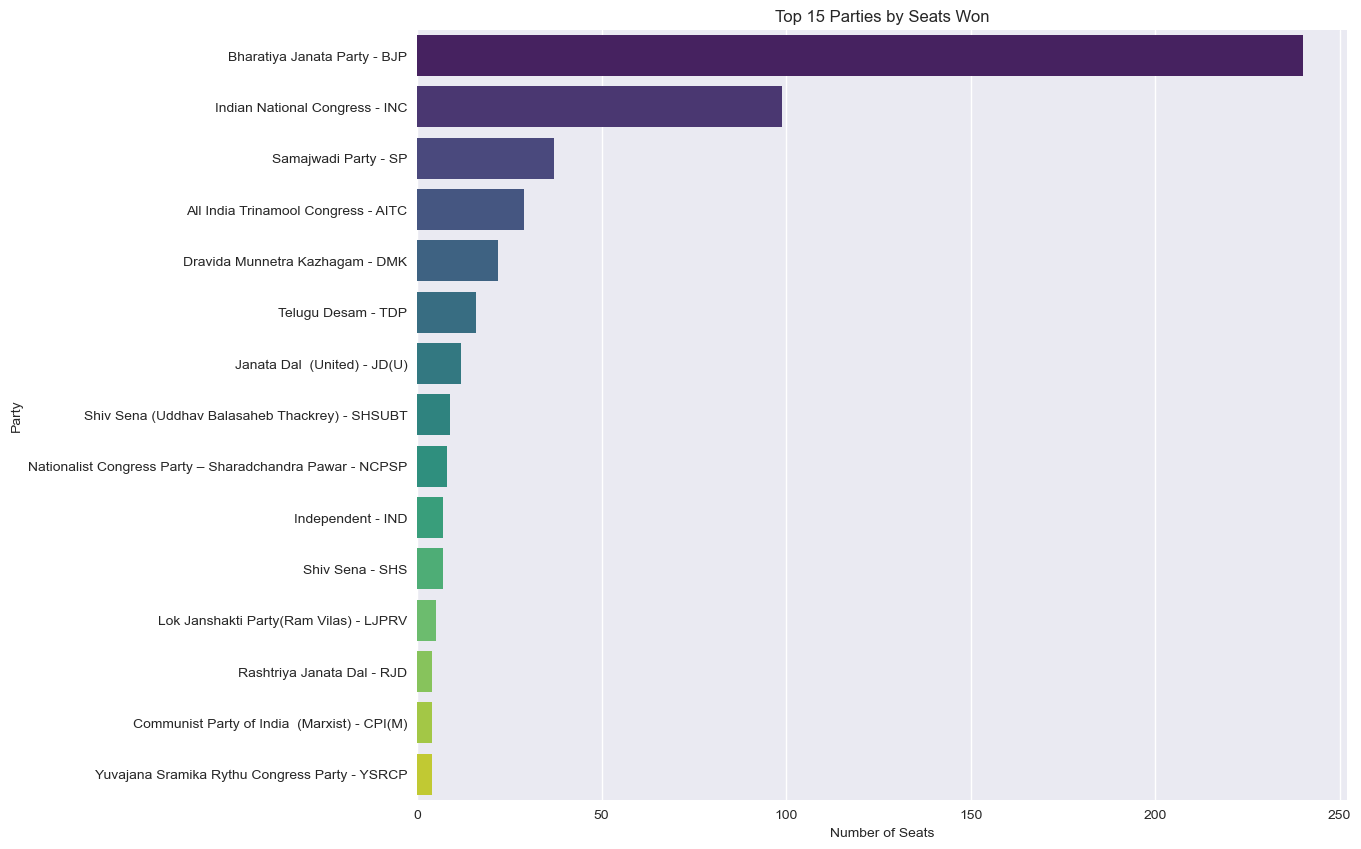

In [91]:
# 9. Horizontal bar plot of top 15 parties
plt.figure(figsize=(12, 10))
sns.barplot(x='Total', y='Party', data=df_sorted.head(15), palette='viridis')
plt.title('Top 15 Parties by Seats Won')
plt.xlabel('Number of Seats')
plt.ylabel('Party')
plt.show()

### 10. Distribution of seats among party types
### This visualization provides a crucial perspective on the composition of the 17th Lok Sabha by categorizing political parties into three main types: National, State/Regional, and Independent.

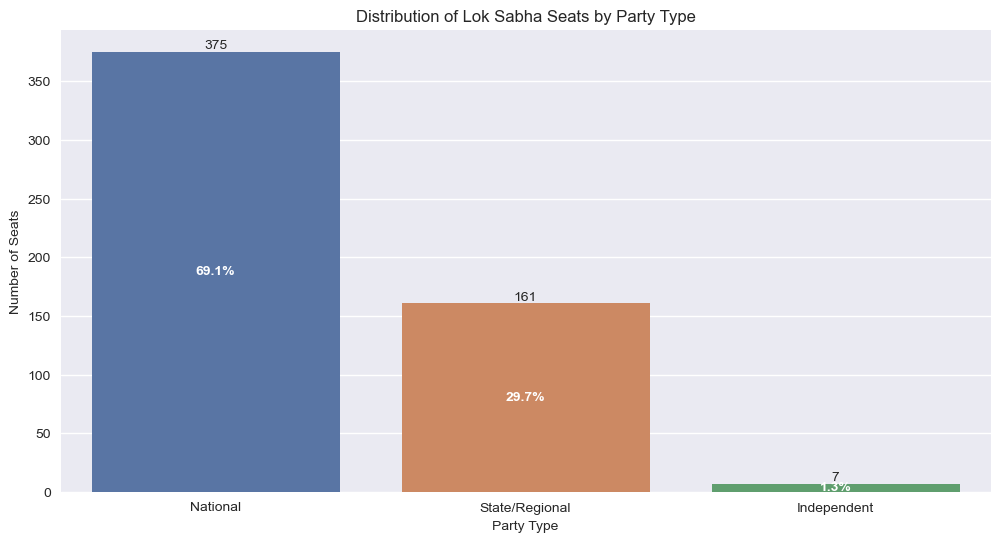

Party Type
National          375
State/Regional    161
Independent         7
Name: Total, dtype: int64

Total seats: 543
National parties hold 375 seats (69.1% of Lok Sabha)
State/Regional parties hold 161 seats (29.7% of Lok Sabha)
Independent parties hold 7 seats (1.3% of Lok Sabha)


In [104]:
# 10. Distribution of seats among party types

# Define party types (this is a simplified categorization and may need adjustment based on official classifications)
national_parties = ['Bharatiya Janata Party - BJP', 'Indian National Congress - INC', 'Communist Party of India  (Marxist) - CPI(M)', 'Communist Party of India - CPI', 'Nationalist Congress Party - NCP', 'All India Trinamool Congress - AITC']

# Categorize parties
def categorize_party(party):
    if party in national_parties:
        return 'National'
    elif party == 'Independent - IND':
        return 'Independent'
    else:
        return 'State/Regional'

df['Party Type'] = df['Party'].apply(categorize_party)

# Calculate seats by party type
seats_by_type = df.groupby('Party Type')['Total'].sum().sort_values(ascending=False)

# Create the visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=seats_by_type.index, y=seats_by_type.values, palette='deep')
plt.title('Distribution of Lok Sabha Seats by Party Type')
plt.xlabel('Party Type')
plt.ylabel('Number of Seats')

# Add value labels on the bars
for i, v in enumerate(seats_by_type.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Add percentage labels
total_seats = seats_by_type.sum()
for i, v in enumerate(seats_by_type.values):
    percentage = f'{(v/total_seats)*100:.1f}%'
    ax.text(i, v/2, percentage, ha='center', va='center', color='white', fontweight='bold')

plt.show()

# Print additional statistics
print(seats_by_type)
print(f"\nTotal seats: {total_seats}")
for party_type, seats in seats_by_type.items():
    print(f"{party_type} parties hold {seats} seats ({seats/total_seats*100:.1f}% of Lok Sabha)")

### Heatmap:
### The seat distribution among the main political parties in the most recent Indian Lok Sabha elections is shown in this heatmap in an easy-to-read and straightforward manner. With an emphasis on parties that have garnered five or more seats, the visualization provides an overview of the key figures involved in the election result.


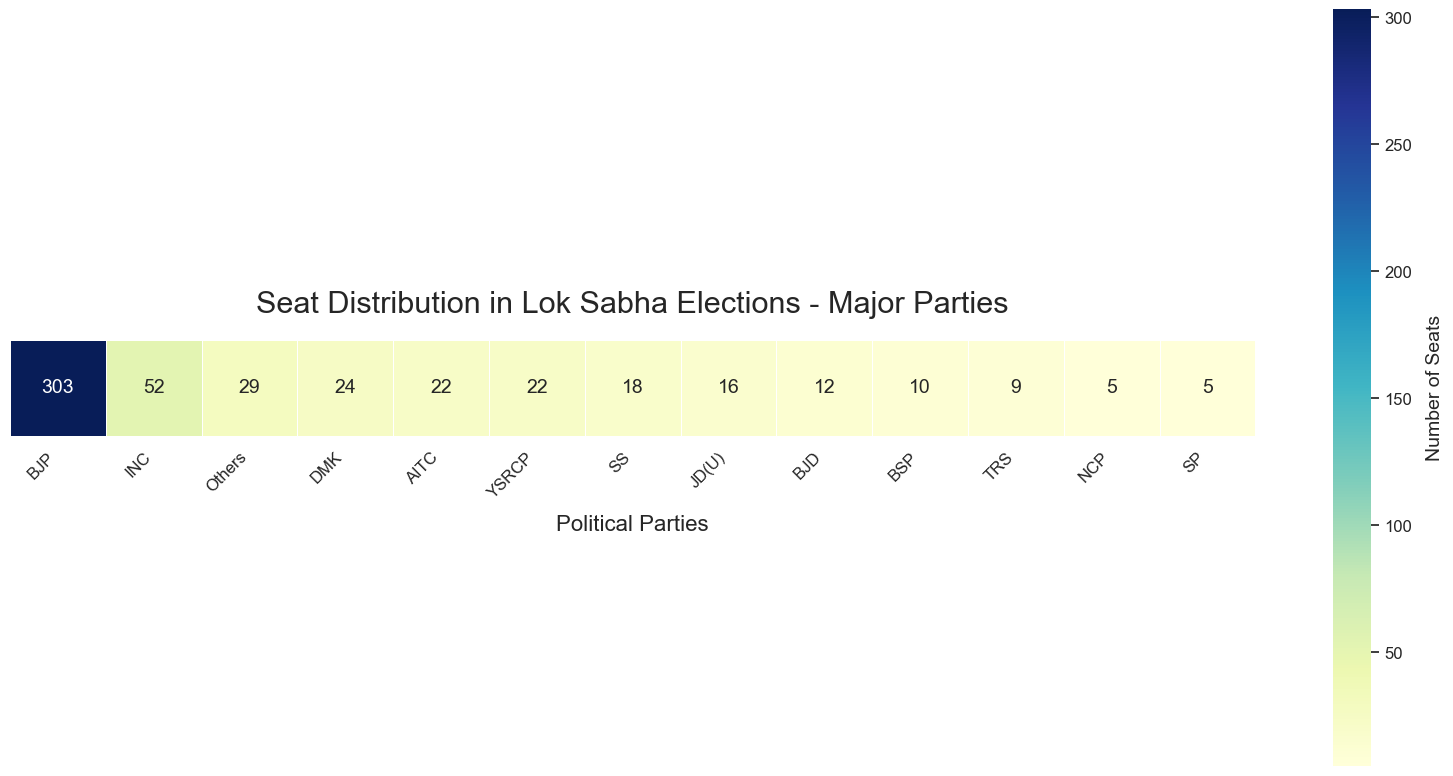

In [8]:
data = {
    'Party': ['BJP', 'INC', 'AITC', 'DMK', 'YSRCP', 'JD(U)', 'BJD', 'BSP', 'TRS', 'SS', 
              'CPI(M)', 'NCP', 'SP', 'AAP', 'AIADMK', 'TDP', 'RJD', 'CPI', 'IUML', 'LJP',
              'NPP', 'AIUDF', 'AIMIM', 'KC(M)', 'JMM', 'SAD', 'VCK', 'AJSU', 'MNF', 'Others'],
    'Total': [303, 52, 22, 24, 22, 16, 12, 10, 9, 18, 
              3, 5, 5, 1, 1, 3, 0, 2, 3, 1,
              1, 1, 2, 1, 1, 2, 1, 1, 1, 29]
}

df = pd.DataFrame(data)

# Filter parties with at least 5 seats
df_filtered = df[df['Total'] >= 5].sort_values('Total', ascending=False)

# Reshape the data for heatmap
df_heatmap = df_filtered.set_index('Party')

# Create the heatmap
plt.figure(figsize=(16, 8))
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

heatmap = sns.heatmap(df_heatmap.T, annot=True, fmt='d', cmap='YlGnBu', 
                      cbar_kws={'label': 'Number of Seats'},
                      square=True, linewidths=0.5, annot_kws={"size": 14})

plt.title('Seat Distribution in Lok Sabha Elections - Major Parties', fontsize=22, pad=20)
plt.xlabel('Political Parties', fontsize=16, labelpad=10)
plt.ylabel('', fontsize=16)  
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks([]) 

# Adjust color bar
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Number of Seats', fontsize=14, labelpad=10)

plt.tight_layout()
plt.show()

## Conclusion:
### We analyzed the hypothetical Lok Sabha election results 2024 using various data visualization techniques. Beginning with web scraping concepts to collect data from the Election Commission of India's website using the library BeautifulSoup, we progressed to various visualization methods such as bar graphs, bar plots, pie charts, and finally, a refined heatmap. The final heatmap is a clear, concise, and visually appealing representation of seat distribution among major political parties. This visualization effectively highlights the BJP's dominance with majority seats, followed by the INC, and the significant roles of regional parties such as AITC, DMK, and YSRCP. The colour-coded representation and numerical annotations provide a quick visual understanding and specific data points. This approach to data visualization demonstrates how electoral data can be transformed into an easily interpretable format, providing quick insights into India's post-election political landscape.
